In [ ]:

import geopandas as gpd
import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt
from rasterio.plot import show
import os

<Axes: >

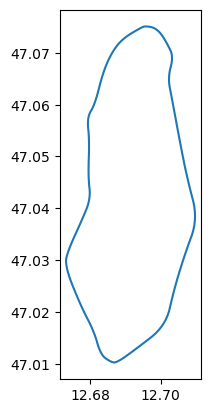

In [4]:
aoi.boundary.plot()

In [5]:
aoi.total_bounds

array([12.67322755, 47.01023763, 12.70976208, 47.07509681])

In [20]:
year = "2019"
out_dir = "WGS84"
os.makedirs(out_dir, exist_ok=True)

In [22]:
destination_crs = 'EPSG:4326'
with rio.open(f"ALS_DTM/{year}_ALS_DTM_CRS3035RES50000mN2650000E4500000.tif") as source:
    transform, width, height = calculate_default_transform(
        source.crs, 
        destination_crs,
        source.width,
        source.height,
        *source.bounds)
    kwargs = source.meta.copy()
    kwargs.update({
        "crs": destination_crs,
        "transform":transform,
        "width": width,
        "height": height
    })
    with rio.open(f"{out_dir}/{year}_DTM_wgs84.tif", 'w', **kwargs) as destination:
        reproject(
            source=rio.band(source, 1),
            destination=rio.band(destination, 1),
            src_transform=source.transform,
            src_crs=source.crs,
            dst_transform=transform,
            dst_crs=destination_crs,
            resampling=Resampling.nearest
        )

WarpOperationError: Chunk and warp failed